In [148]:
#importing library
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
#loading the dataset
df=pd.read_csv('/kaggle/input/bank-marketing-campaigns-dataset/bank-additional-full.csv',delimiter=';')

#showing the datatset
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [104]:
#checking for missing value
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [105]:
#getting preliminary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [106]:
df['y'].unique()

array(['no', 'yes'], dtype=object)

In [107]:
df['y']=df['y'].apply(lambda x:1 if x=='yes' else 0)

In [108]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [109]:
df.select_dtypes('object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [110]:
{column:len(df[column].unique()) for column in df.columns if df[column].dtype=='object'}

{'job': 12,
 'marital': 4,
 'education': 8,
 'default': 3,
 'housing': 3,
 'loan': 3,
 'contact': 2,
 'month': 10,
 'day_of_week': 5,
 'poutcome': 3}

In [111]:
nominal_feature=['job','marital','education','poutcome']

binary_feature=['default','housing','loan','contact']

ordinal_feature=['day_of_week','month']

In [83]:
df['default'].mode()[0]

'no'

In [112]:
#replacing unkonwn to np.NaN
df=df.replace({"unknown":np.NaN})

In [113]:
def onehot_encode(df,columns):
    df=df.copy()
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [114]:
for column in binary_feature:
    df[column]=df[column].fillna(df[column].mode()[0])


In [115]:
for column in nominal_feature:
    df[column]=df[column].fillna(df[column].mode()[0])

In [116]:
for column in ordinal_feature:
    df[column]=df[column].fillna(df[column].mode()[0])

In [117]:
for column in ['default','housing','loan']:
    df[column]=df[column].replace({'yes':1,'no':0})

/tmp/ipykernel_36/449449435.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column]=df[column].replace({'yes':1,'no':0})


In [118]:
df['contact']=df['contact'].replace({'telephone':0,'cellular':1})

/tmp/ipykernel_36/2708526589.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['contact']=df['contact'].replace({'telephone':0,'cellular':1})


In [119]:
month_encoding={'may':2, 'jun':3, 'jul':4, 'aug':5, 'oct':6, 'nov':7, 'dec':8, 'mar':0, 'apr':1, 'sep':9}
df['month']=df['month'].replace(month_encoding)

/tmp/ipykernel_36/3582435952.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['month']=df['month'].replace(month_encoding)


In [120]:
day_encoding={'mon':0, 'tue':1, 'wed':2, 'thu':3, 'fri':4}
df['day_of_week']=df['day_of_week'].replace(day_encoding)

/tmp/ipykernel_36/1174079785.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['day_of_week']=df['day_of_week'].replace(day_encoding)


In [94]:
list(df['day_of_week'].unique())

[0, 1, 2, 3, 4]

In [95]:
list(df['month'].unique())

[2, 3, 4, 5, 6, 7, 8, 0, 1, 9]

In [121]:
df=onehot_encode(df,nominal_feature)

In [122]:
{column:list(df[column].unique()) for column in df.columns  if df[column].dtype=='object'}

{}

In [123]:
df.isin(["unknown"]).sum()

age                              0
default                          0
housing                          0
loan                             0
contact                          0
month                            0
day_of_week                      0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
y                                0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
marital_divorced    

In [124]:
df.isin(["unknown"]).sum()

age                              0
default                          0
housing                          0
loan                             0
contact                          0
month                            0
day_of_week                      0
duration                         0
campaign                         0
pdays                            0
previous                         0
emp.var.rate                     0
cons.price.idx                   0
cons.conf.idx                    0
euribor3m                        0
nr.employed                      0
y                                0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
marital_divorced    

In [125]:
for column in df.columns:
    if df[column].dtype=='bool':
        df[column]=df[column].astype(int)

In [126]:
[column for column in df.columns if df[column].dtype=='object']

[]

In [127]:
df

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,0,0,0,0,2,0,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0
1,57,0,0,0,0,2,0,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,0,1,0,0,2,0,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,0,0,0,0,2,0,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0
4,56,0,0,1,0,2,0,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0,1,0,1,7,4,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
41184,46,0,0,0,1,7,4,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
41185,56,0,1,0,1,7,4,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
41186,44,0,0,0,1,7,4,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0


In [128]:
y=df['y']
x=df.drop('y',axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=123,shuffle=True)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns,index=x_train.index)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns,index=x_test.index)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28831, 40)
(12357, 40)
(28831,)
(12357,)


In [129]:
x_train

,age,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,poutcome_failure,poutcome_nonexistent,poutcome_success
1317,0.479897,-0.010201,-1.096518,-0.420789,-1.311158,-0.812069,0.722008,0.233079,-0.573111,0.195559,-0.348328,0.640729,0.716223,0.879444,0.703768,0.324164,1.684331,-0.537477,-0.190535,-0.162305,-0.277179,-0.206852,-0.18788,-0.327450,-0.149707,-0.443346,-0.160268,-0.354146,0.801685,-0.623305,-0.335058,-0.242718,-0.415064,-0.547760,-0.019537,-0.384595,1.404375,-0.338569,0.397506,-0.18649
23228,-1.058517,-0.010201,0.911977,-0.420789,0.762684,0.780491,-0.694832,7.050209,1.268589,0.195559,-0.348328,0.832074,-0.233354,0.944309,0.767418,0.840284,-0.593708,-0.537477,-0.190535,-0.162305,-0.277179,-0.206852,-0.18788,3.053897,-0.149707,-0.443346,-0.160268,-0.354146,0.801685,-0.623305,-0.335058,-0.242718,-0.415064,-0.547760,-0.019537,2.600135,-0.712061,-0.338569,0.397506,-0.18649
3524,0.576048,-0.010201,-1.096518,-0.420789,-1.311158,-0.812069,1.430428,-0.475595,0.163569,0.195559,-0.348328,0.640729,0.716223,0.879444,0.706082,0.324164,-0.593708,-0.537477,-0.190535,-0.162305,-0.277179,-0.206852,-0.18788,-0.327450,-0.149707,-0.443346,6.239562,-0.354146,0.801685,-0.623305,-0.335058,-0.242718,-0.415064,1.825618,-0.019537,-0.384595,-0.712061,-0.338569,0.397506,-0.18649
2271,-0.289310,-0.010201,0.911977,-0.420789,-1.311158,-0.812069,-0.694832,0.999524,-0.573111,0.195559,-0.348328,0.640729,0.716223,0.879444,0.704346,0.324164,-0.593708,-0.537477,-0.190535,-0.162305,-0.277179,-0.206852,-0.18788,3.053897,-0.149707,-0.443346,-0.160268,-0.354146,0.801685,-0.623305,-0.335058,-0.242718,2.409269,-0.547760,-0.019537,-0.384595,-0.712061,-0.338569,0.397506,-0.18649
4059,1.345255,-0.010201,-1.096518,-0.420789,-1.311158,-0.812069,-1.403252,-0.356199,0.163569,0.195559,-0.348328,0.640729,0.716223,0.879444,0.705504,0.324164,-0.593708,1.860543,-0.190535,-0.162305,-0.277179,-0.206852,-0.18788,-0.327450,-0.149707,-0.443346,-0.160268,-0.354146,0.801685,-0.623305,2.984554,-0.242718,-0.415064,-0.547760,-0.019537,-0.384595,-0.712061,-0.338569,0.397506,-0.18649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,-1.346969,-0.010201,-1.096518,-0.420789,-1.311158,-0.281215,-1.403252,-0.718238,0.163569,0.195559,-0.348328,0.832074,1.529407,-0.288114,0.709554,0.840284,-0.593708,-0.537477,-0.190535,-0.162305,3.607775,-0.206852,-0.18788,-0.327450,-0.149707,-0.443346,-0.160268,-0.354146,-1.247373,1.604351,-0.335058,-0.242718,-0.415064,-0.547760,-0.019537,-0.384595,1.404375,-0.338569,0.397506,-0.18649
15377,0.287595,-0.010201,0.911977,-0.420789,0.762684,0.249638,1.430428,-0.125110,-0.573111,0.195559,-0.348328,0.832074,0.585009,-0.482707,0.762789,0.840284,-0.593708,1.860543,-0.190535,-0.162305,-0.277179,-0.206852,-0.18788,-0.327450,-0.149707,-0.443346,-0.160268,-0.354146,0.801685,-0.623305,-0.335058,-0.242718,2.409269,-0.547760,-0.019537,-0.384595,-0.712061,-0.338569,0.397506,-0.18649
17730,1.345255,-0.010201,-1.096518,2.376485,0.762684,0.249638,-0.694832,-0.155922,-0.573111,0.195559,-0.348328,0.832074,0.585009,-0.482707,0.765103,0.840284,-0.593708,-0.537477,-0.190535,-0.162305,3.607775,-0.206852,-0.18788,-0.327450,-0.149707,-0.443346,-0.160268,-0.354146,0.801685,-0.623305,-0.335058,-0.242718,-0.415064,-0.547760,-0.019537,-0.384595,1.404375,-0.338569,0.397506,-0.18649
28030,-0.097008,-0.010201,-1.096518,-0.420789,0.762684,-1.342922,0.722008,1.307643,-0.204771,0.195559,3.684053,-1.208936,-0.870434,-1.434051,-

# Constructing the Model

In [130]:
inputs=tf.keras.Input(shape=(40,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs=inputs,outputs=outputs)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,849 (26.75 KB)

 Trainable params: 6,849 (26.75 KB)

 Non-trainable params: 0 (0.00 B)

In [131]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])

history=model.fit(x_train,y_train,validation_split=0.2,batch_size=32,epochs=100,
                  callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)])
                                                                   

Epoch 1/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9031 - auc: 0.8337 - loss: 0.2649 - val_accuracy: 0.9095 - val_auc: 0.9259 - val_loss: 0.2023
Epoch 2/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9080 - auc: 0.9245 - loss: 0.2026 - val_accuracy: 0.9107 - val_auc: 0.9321 - val_loss: 0.1954
Epoch 3/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9139 - auc: 0.9368 - loss: 0.1892 - val_accuracy: 0.9051 - val_auc: 0.9278 - val_loss: 0.1993
Epoch 4/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9151 - auc: 0.9399 - loss: 0.1842 - val_accuracy: 0.9060 - val_auc: 0.9339 - val_loss: 0.1922
Epoch 5/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9144 - auc: 0.9408 - loss: 0.1820 - val_accuracy: 0.9100 - val_auc: 0.9324 - val_loss: 0.1959
Epoch 6/100
721/721 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9152 - auc: 0.9418 - loss: 0.1833 - val_accuracy: 0.9083 - val_auc: 0.9354 - val_loss: 0.1917
Epoch 7/100
721/721 ━━━━━━━━━━━━━━

# Result 

In [132]:
model.evaluate(x_test,y_test)

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9118 - auc: 0.9411 - loss: 0.1836


[0.18931984901428223, 0.909686803817749, 0.9366422295570374]

In [133]:
model.predict(x_test)

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.00021689],
       [0.16116673],
       [0.00694268],
       ...,
       [0.04068929],
       [0.03820503],
       [0.00226541]], dtype=float32)

In [140]:
y_pred=np.squeeze(model.predict(x_test))

387/387 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [141]:
y_pred

array([0.00021689, 0.16116673, 0.00694268, ..., 0.04068929, 0.03820503,
       0.00226541], dtype=float32)

In [142]:
y_pred=(y_pred>0.5).astype(int)

In [144]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

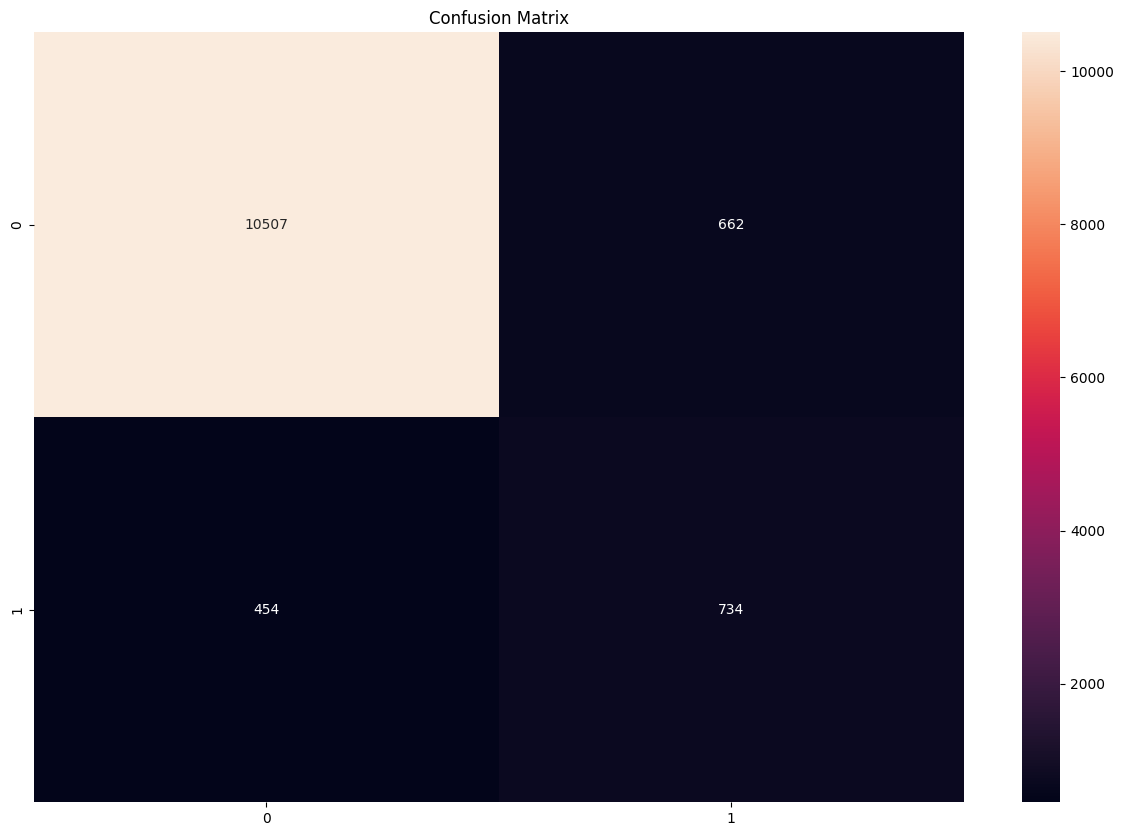

In [150]:
cm=confusion_matrix(y_pred,y_test)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.show()


In [152]:
clr=classification_report(y_pred,y_test)
print(clr)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     11169
           1       0.53      0.62      0.57      1188

    accuracy                           0.91     12357
   macro avg       0.74      0.78      0.76     12357
weighted avg       0.92      0.91      0.91     12357

